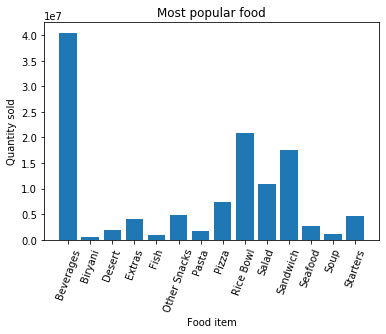

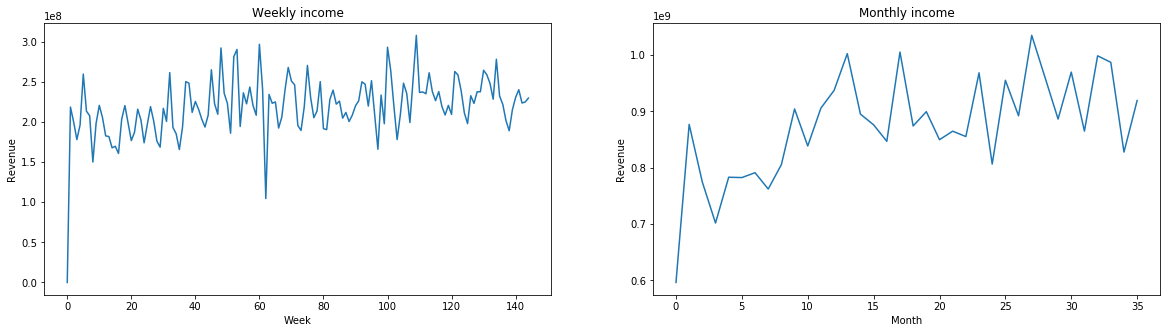

In [4]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''************************Your code here**********************'''

'''************************************************************'''


#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided


'''************************Your code here**********************'''

'''************************************************************'''

df_meal=pd.read_csv('meal_info.csv')
df_meal.head()'''This is for displaying first five data points'''

#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''

'''************************************************************'''
df_center=pd.read_csv('fulfilment_center_info.csv')
df_center.head()'''This is for displaying first five data points'''

#read train.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''

'''************************************************************'''
df_food=pd.read_csv('train.csv')
df_food.head()

'''Since the provided information is in different files, your work here is to merge them.Look for the functions
in pandas library to do so'''

'''************************Your code here**********************'''


'''************************************************************'''
df=pd.merge(df_food,df_meal,on='meal_id')

df.head()
'''Here we have used pd.pivot_table() kindly go through the function and mention in comment what it does'''

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)



'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(y-axis)

give x label 'Food items'
give y label 'Quantity sold'


'''

'''************Yourcode*********************'''







#bar graph

table.plot.bar()
#xticks 
plt.xticks(rotation=70) '''rotates the labels of x axis index by 70 degree'''

#x-axis labels 
plt.xlabel('Food items')

#y-axis labels 

plt.ylabel('Quantity sold')
#plot title 

plt.title('Most popular food')
#save plot 
plt.savefig('barg')

#display 

plt.show()
'''************************************************'''


'''Comparison of weekly and monthly sales
 Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders 
** named 'month' by using ['week'] column (week column value divided by 4 gives month value)'''



'''**************************Your code******************************'''
df['revenue']=df['checkout_price']*df['num_orders']
df['month']=(df['week']/4)+1
df['month']=df['month'].astype(int)


'''******************************************************************'''
'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue 
month=[df.month.unique().tolist()] 
month_order=[]
print(len(month[0]))
print(month)
for i in month[0]:
    sub_set=df[df['month']==i]
    sum=sub_set.revenue.sum()
    month_order.append(sub_set.revenue.sum())
    
print(month_order)    
'''***********************************Your code***********************'''

    
'''*********************************************************************'''
'''Here we have created two list week and week_order ,you need to store in them mapping the monthly orders'''    
#list to store week-wise revenue 
week=[df.week.unique().tolist()] 
week_order=[]
print(len(week[0]))
print(week)
for i in week[0]:
    sub_set=df[df['week']==i]
    sum=sub_set.revenue.sum()
    week_order.append(sub_set.revenue.sum())
    
print(week_order) 

'''***********************************Your code***********************'''


'''*********************************************************************'''
''' Plot two subplots in the same space : one for weekly revenue and other for monthly revenue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly revenue.
'''
plt.subplot(121)
plt.title('Weekly income')
plt.xlabel('week')
plt.ylabel('revenue')
plt.plot(week[0],week_order)
plt.subplot(122)
plt.title("Monthly income")
plt.xlabel('month')
plt.ylabel('revenue')
plt.plot(month[0],month_order)
plt.show()

'''************Yourcode*********************'''



''' Display the plot'''


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_meal=pd.read_csv('meal_info.csv')
df_meal.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [11]:
df_center=pd.read_csv('fulfilment_center_info.csv')
df_center.head()


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
df_food=pd.read_csv('train.csv')
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [110]:
df=pd.merge(df_food,df_meal,on='meal_id')
df=pd.merge(df,df_center,on='center_id')
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
print(table)


              num_orders
category                
Beverages       40480525
Biryani           631848
Desert           1940754
Extras           3984979
Fish              871959
Other Snacks     4766293
Pasta            1637744
Pizza            7383720
Rice Bowl       20874063
Salad           10944336
Sandwich        17636782
Seafood          2715714
Soup             1039646
Starters         4649122


In [111]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


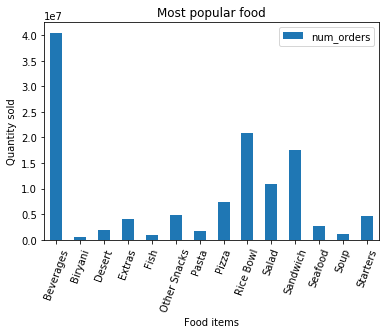

In [112]:
table.plot.bar()
plt.title('Most popular food')
plt.xlabel('Food items')
plt.ylabel('Quantity sold')
plt.xticks(rotation=70)
plt.savefig('barg')
plt.show()


In [113]:
df['revenue']=df['checkout_price']*df['num_orders']
df['month']=(df['week']//4)+1

df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,revenue,month
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,24218.91,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,43873.09,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,12760.32,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,22145.18,2
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,31497.50,2


In [114]:
month=[df.month.unique().tolist()] 
month_order=[]
for i in month[0]:
    sub_set=df[df['month']==i]
    sum=sub_set.revenue.sum()
    month_order.append(sub_set.revenue.sum())
    
    
week=[df.week.unique().tolist()] 
week_order=[]
for i in week[0]:
    sub_set=df[df['week']==i]
    sum=sub_set.revenue.sum()
    week_order.append(sub_set.revenue.sum())
    

   





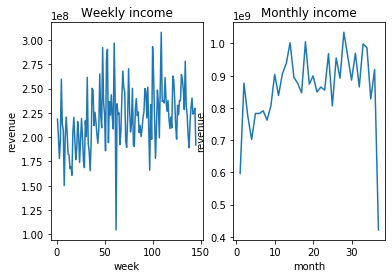

In [115]:
plt.subplot(121)
plt.title('Weekly income')
plt.xlabel('week')
plt.ylabel('revenue')
plt.plot(week[0],week_order)
plt.subplot(122)
plt.title("Monthly income")
plt.xlabel('month')
plt.ylabel('revenue')
plt.plot(month[0],month_order)
plt.show()